[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyGenomeViz/blob/main/docs/example_gallery.ipynb)

In [1]:
# !pip install pygenomeviz
# !apt install ncbi-blast+ mummer mmseqs2

## Yersinia phage

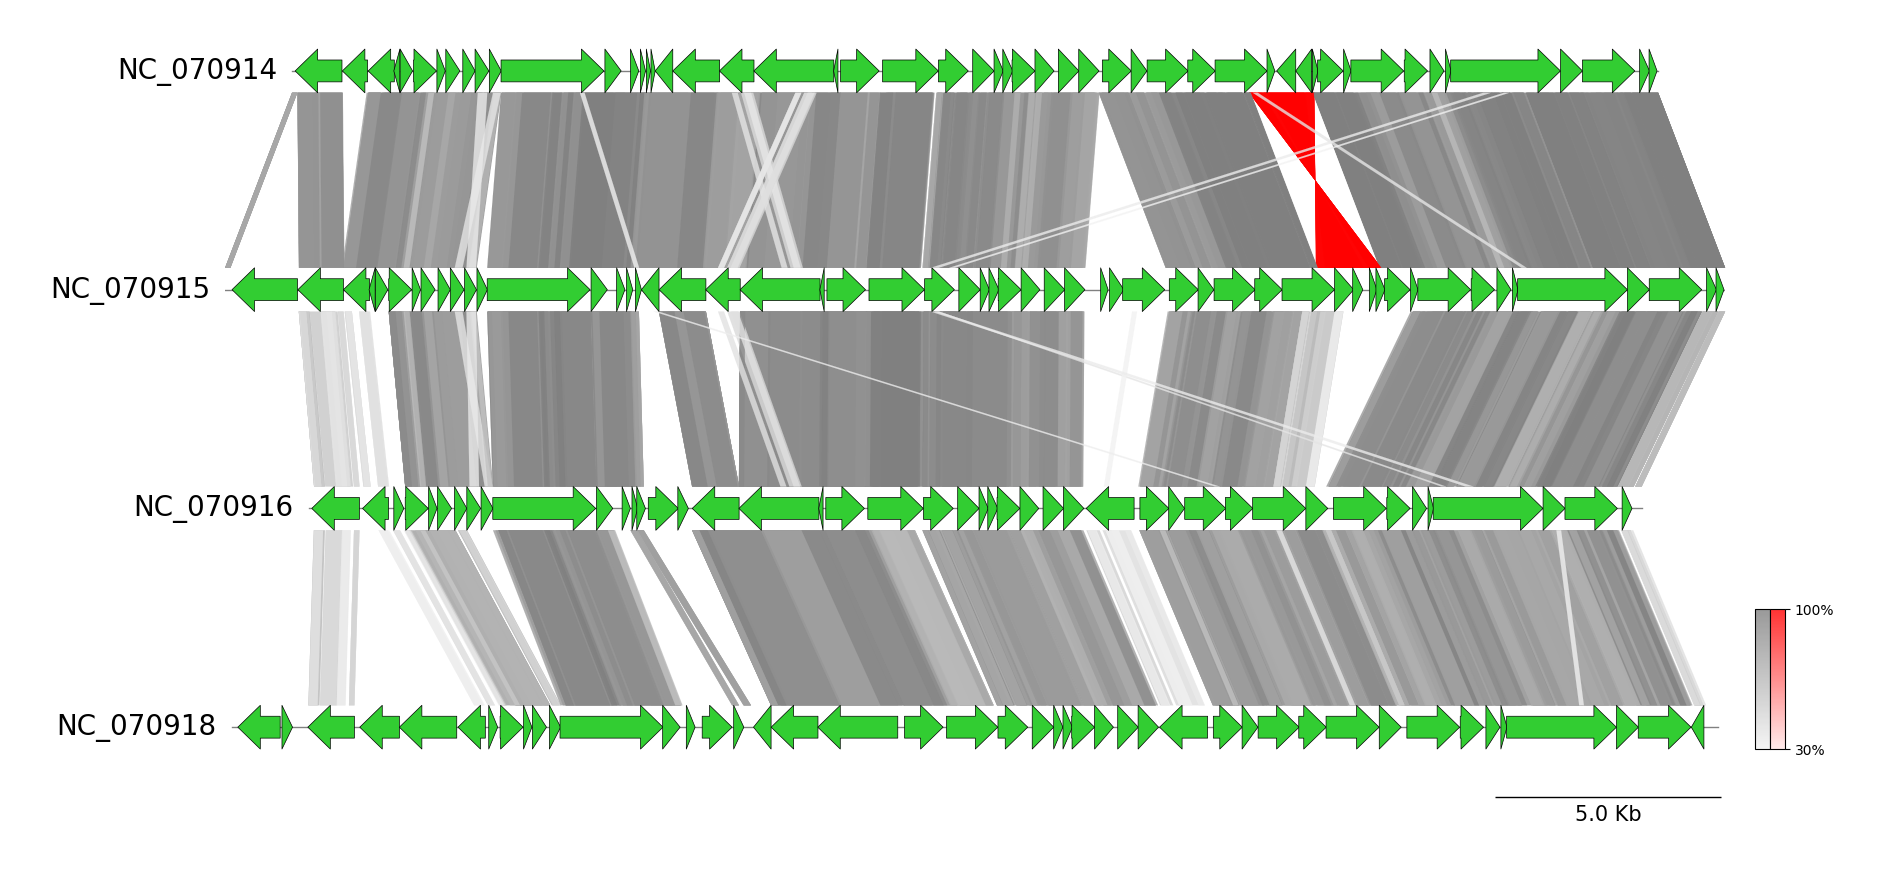

In [2]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset
from pygenomeviz.align import Blast, AlignCoord

gbk_files = load_example_genbank_dataset("yersinia_phage")
gbk_list = list(map(Genbank, gbk_files))

gv = GenomeViz(track_align_type="center")
gv.set_scale_bar()

# Plot CDS features
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), align_label=False)
    for seqid, features in gbk.get_seqid2features("CDS").items():
        segment = track.get_segment(seqid)
        segment.add_features(features, plotstyle="bigarrow", fc="limegreen", lw=0.5)

# Run BLAST alignment & filter by user-defined threshold
align_coords = Blast(gbk_list, seqtype="protein").run()
align_coords = AlignCoord.filter(align_coords, length_thr=100, identity_thr=30)

# Plot BLAST alignment links
if len(align_coords) > 0:
    min_ident = int(min([ac.identity for ac in align_coords if ac.identity]))
    color, inverted_color = "grey", "red"
    for ac in align_coords:
        gv.add_link(ac.query_link, ac.ref_link, color=color, inverted_color=inverted_color, v=ac.identity, vmin=min_ident)
    gv.set_colorbar([color, inverted_color], vmin=min_ident)

fig = gv.plotfig()
# gv.savefig("result.png")
# gv.savefig_html("result.html")

## Enterobacteria phage

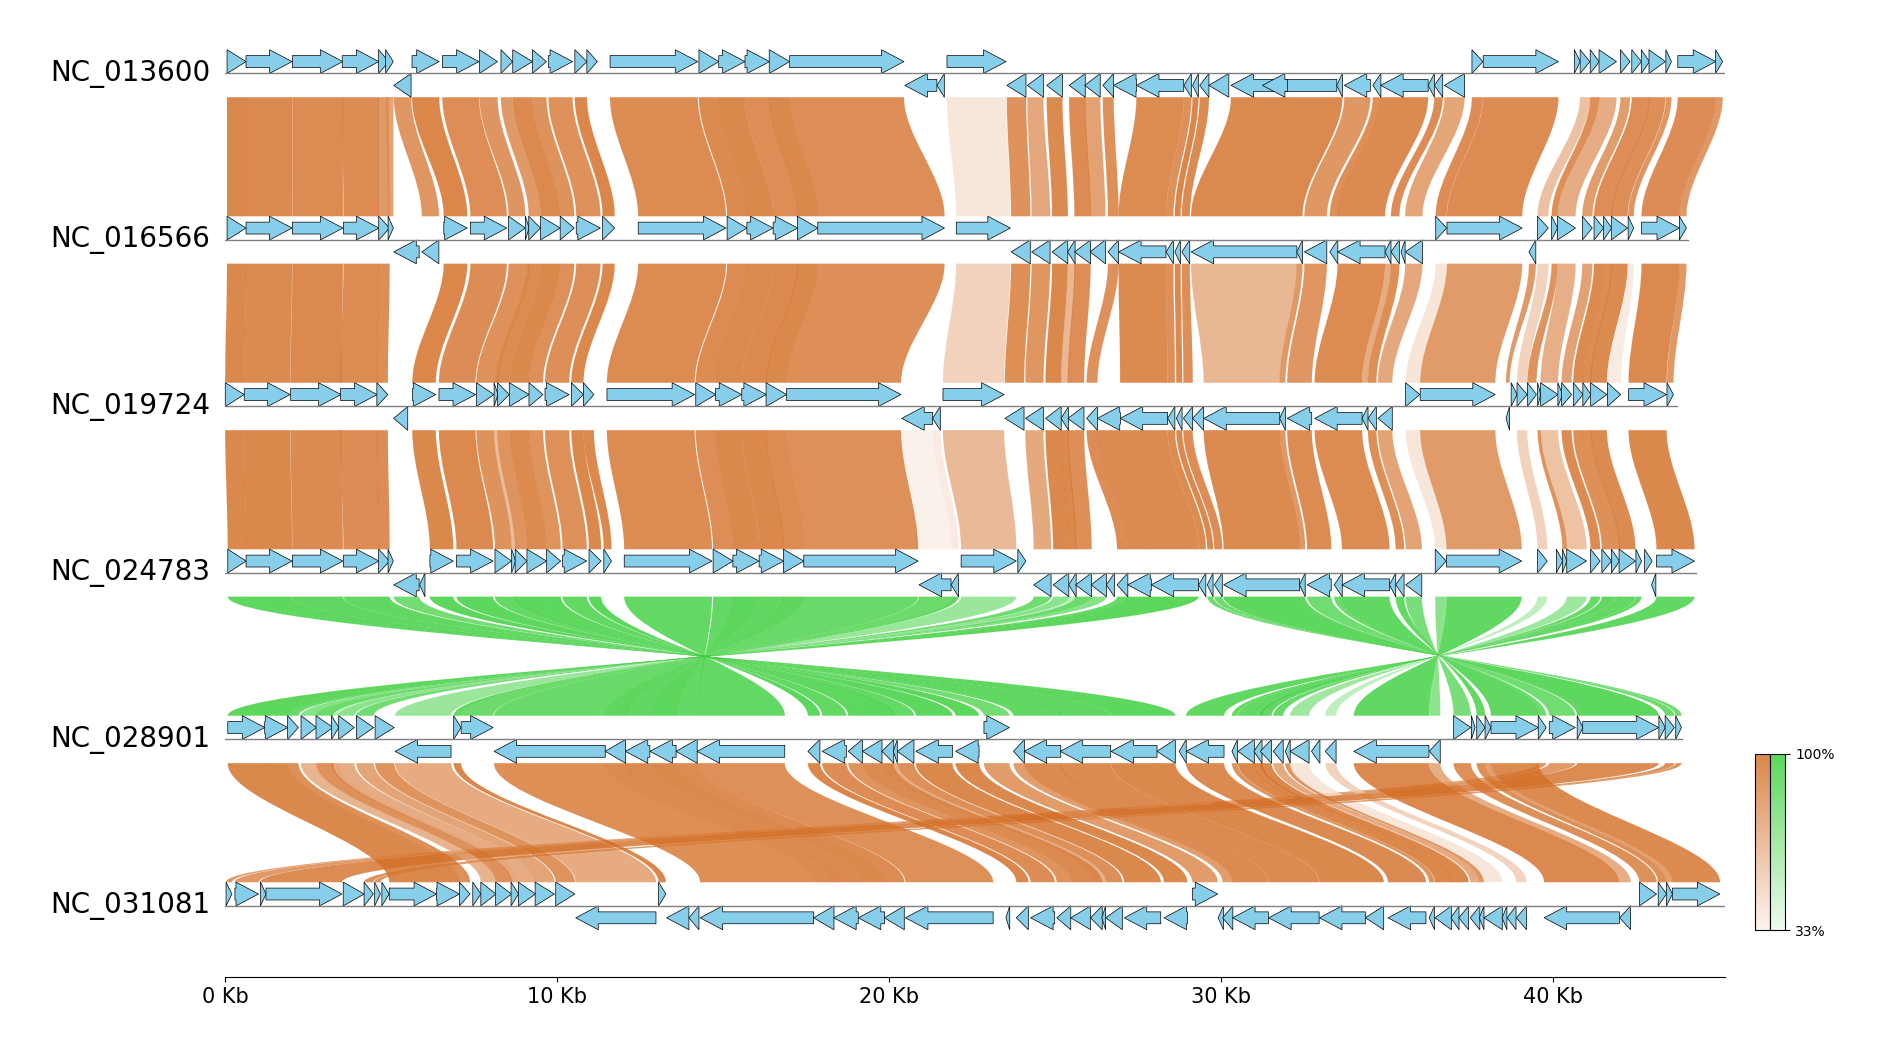

In [3]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset
from pygenomeviz.align import MMseqs

gbk_files = load_example_genbank_dataset("enterobacteria_phage")
gbk_list = list(map(Genbank, gbk_files))

gv = GenomeViz(fig_track_height=0.8, feature_track_ratio=0.4)
gv.set_scale_xticks()

# Plot CDS features
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), align_label=False)
    for seqid, features in gbk.get_seqid2features("CDS").items():
        segment = track.get_segment(seqid)
        segment.add_features(features, fc="skyblue", lw=0.5)

# Run MMseqs RBH search
align_coords = MMseqs(gbk_list).run()

# Plot MMseqs RBH search links
if len(align_coords) > 0:
    min_ident = int(min([ac.identity for ac in align_coords if ac.identity]))
    color, inverted_color = "chocolate", "limegreen"
    for ac in align_coords:
        gv.add_link(ac.query_link, ac.ref_link, color=color, inverted_color=inverted_color, v=ac.identity, vmin=min_ident, curve=True)
    gv.set_colorbar([color, inverted_color], vmin=min_ident)

fig = gv.plotfig()

## Acinetobacter phage

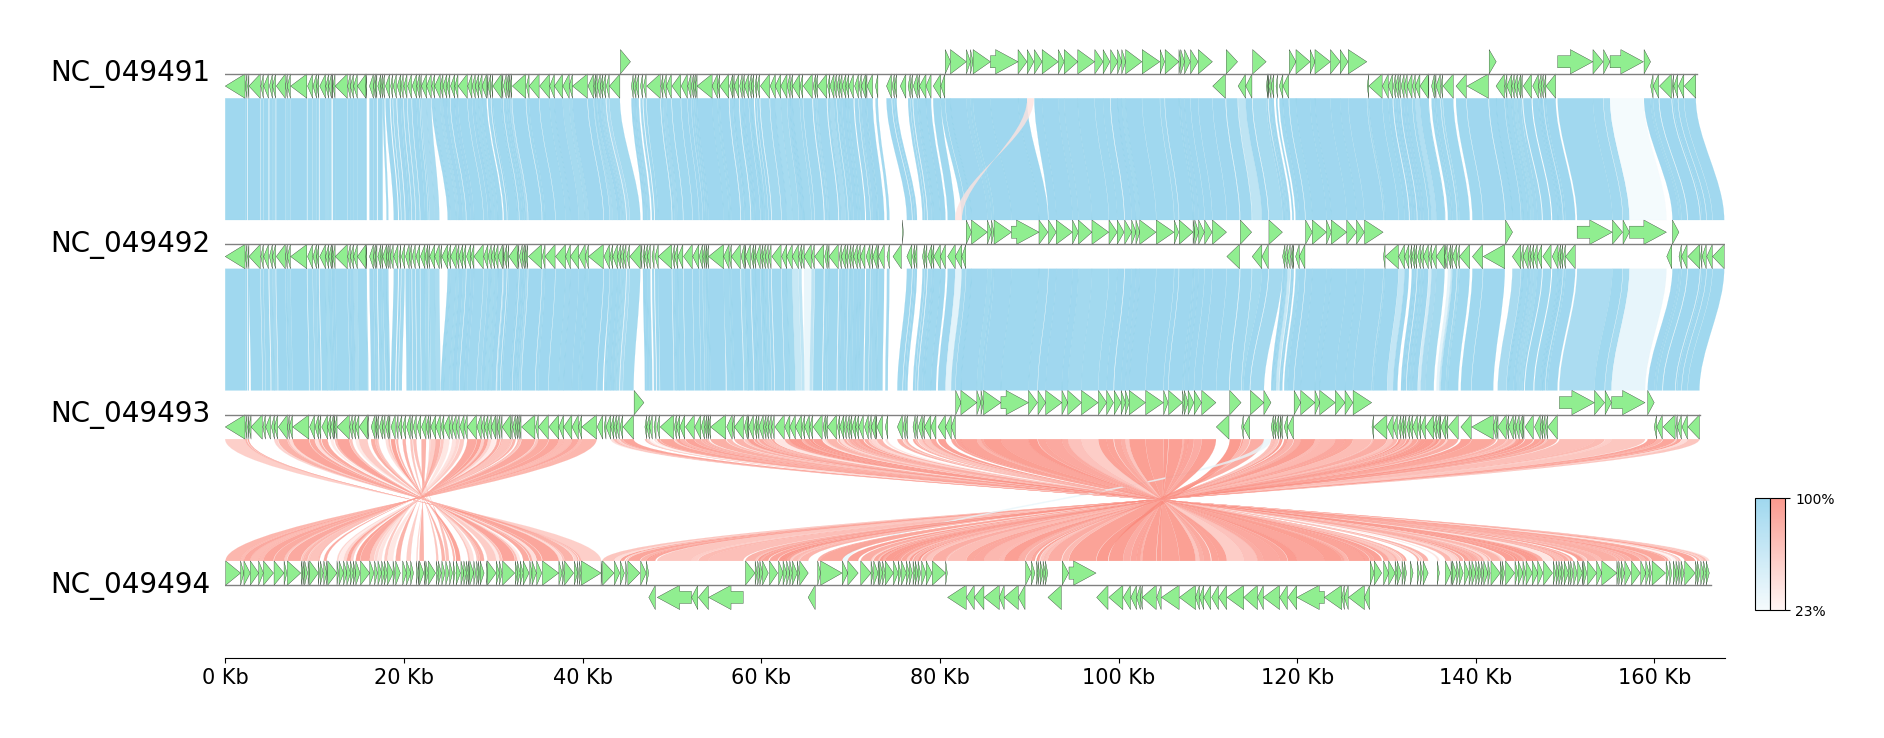

In [4]:

from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset
from pygenomeviz.align import MMseqs

gbk_files = load_example_genbank_dataset("acinetobacter_phage")
gbk_list = list(map(Genbank, gbk_files))

gv = GenomeViz(fig_track_height=0.8, feature_track_ratio=0.4)
gv.set_scale_xticks()

# Plot CDS features
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), align_label=False)
    for seqid, features in gbk.get_seqid2features("CDS").items():
        segment = track.get_segment(seqid)
        segment.add_features(features, fc="lightgreen", lw=0.2)

# Run MMseqs RBH search
align_coords = MMseqs(gbk_list).run()

# Plot MMseqs RBH search links
if len(align_coords) > 0:
    min_ident = int(min([ac.identity for ac in align_coords if ac.identity]))
    color, inverted_color = "skyblue", "salmon"
    for ac in align_coords:
        gv.add_link(ac.query_link, ac.ref_link, color=color, inverted_color=inverted_color, v=ac.identity, vmin=min_ident, curve=True)
    gv.set_colorbar([color, inverted_color], vmin=min_ident)

fig = gv.plotfig()

## Mycoplasma mycoides

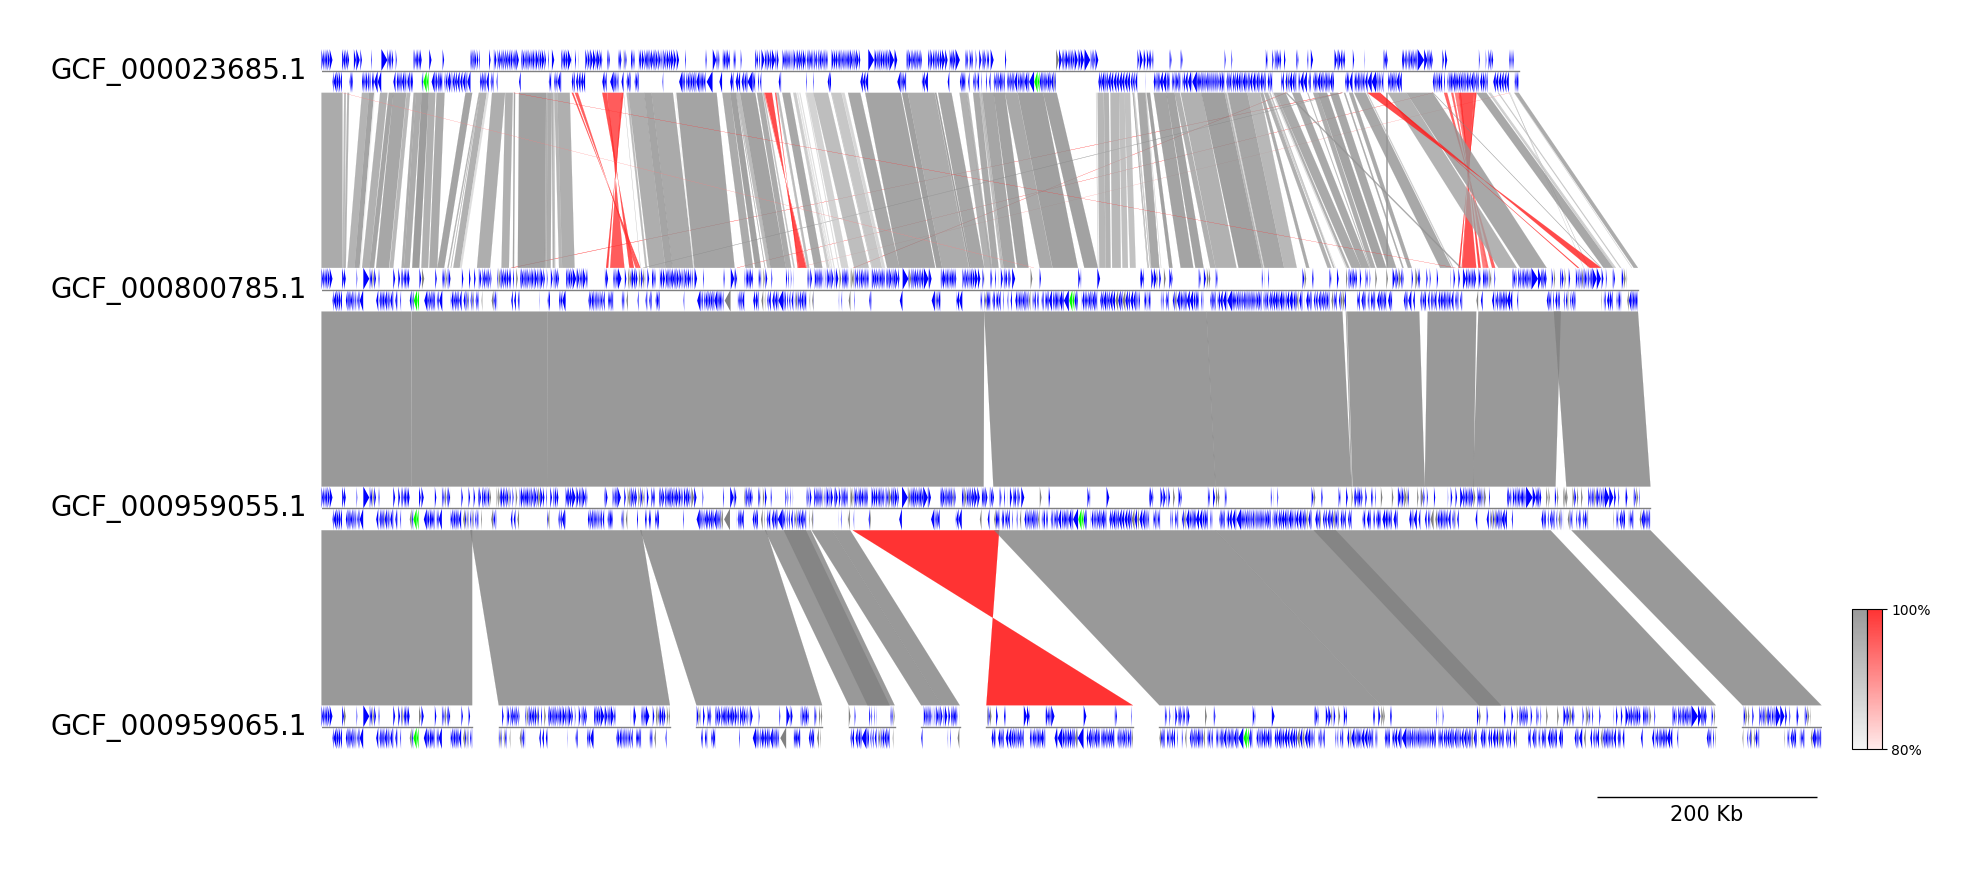

In [5]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset, is_pseudo_feature
from pygenomeviz.align import MUMmer

gbk_files = load_example_genbank_dataset("mycoplasma_mycoides")
gbk_list = list(map(Genbank, gbk_files))

gv = GenomeViz()
gv.set_scale_bar()

# Plot CDS, rRNA features for each contig to tracks
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), align_label=False)
    for seqid, features in gbk.get_seqid2features(None).items():
        segment = track.get_segment(seqid)
        for feature in features:
            if feature.type == "CDS":
                # CDS: blue, CDS(pseudo): grey
                color = "grey" if is_pseudo_feature(feature) else "blue"
                segment.add_features(feature, fc=color)
            elif feature.type == "rRNA":
                # rRNA: lime
                segment.add_features(feature, fc="lime")

# Run MUMmer alignment
align_coords = MUMmer(gbk_list).run()

# Plot MUMmer alignment links
if len(align_coords) > 0:
    min_ident = int(min([ac.identity for ac in align_coords if ac.identity]))
    color, inverted_color = "grey", "red"
    for ac in align_coords:
        gv.add_link(ac.query_link, ac.ref_link, color=color, inverted_color=inverted_color, v=ac.identity, vmin=min_ident)
    gv.set_colorbar([color, inverted_color], vmin=min_ident)

fig = gv.plotfig()

## Escherichia coli

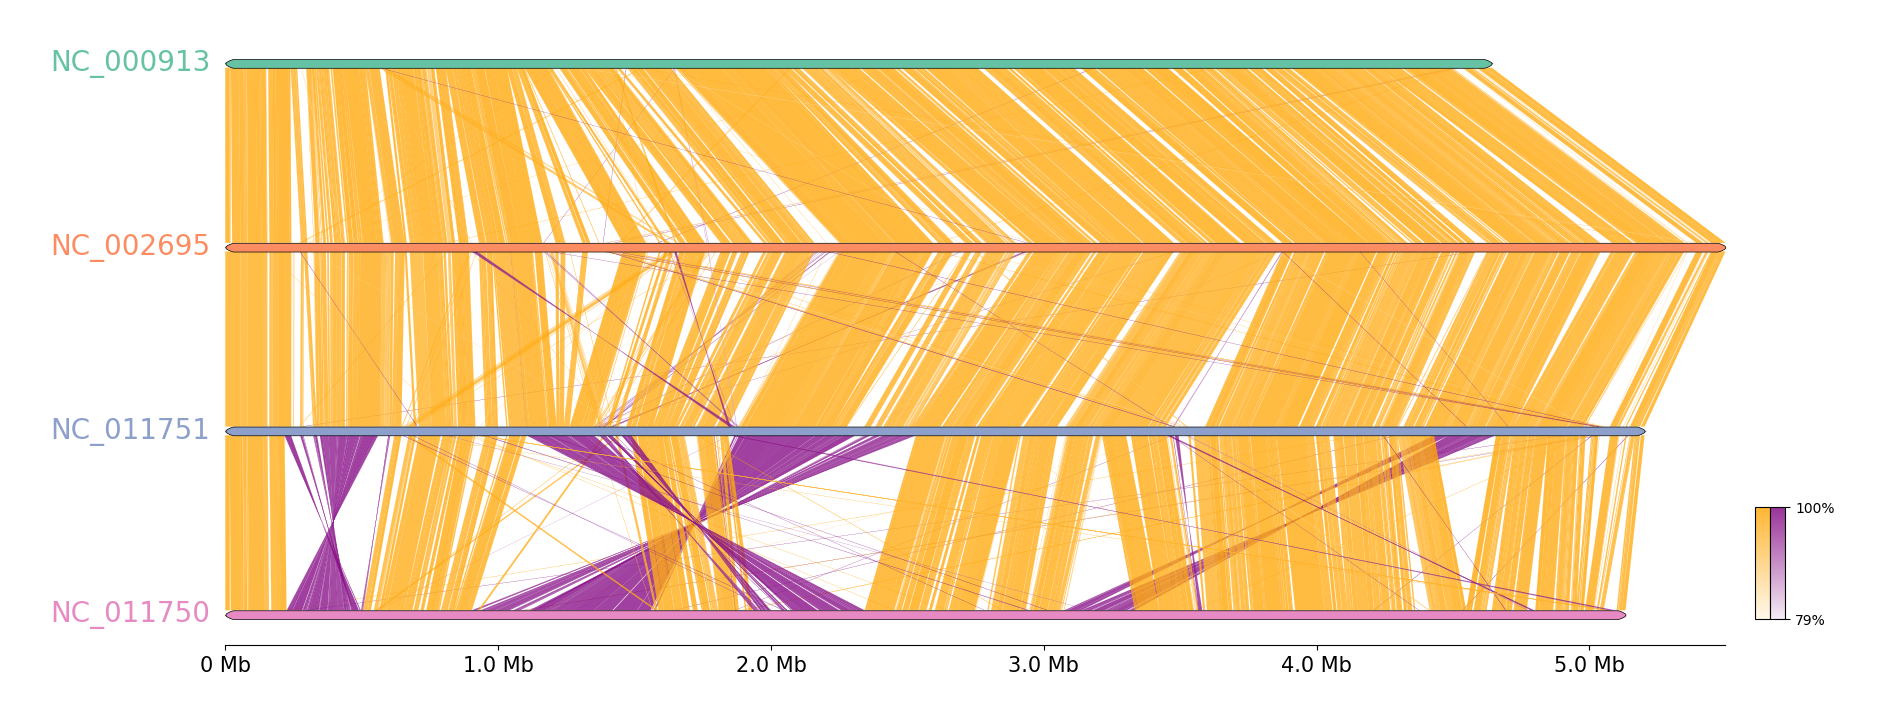

In [6]:
from pygenomeviz import GenomeViz
from pygenomeviz.align import MUMmer
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset, ColorCycler
ColorCycler.set_cmap("Set2")

gbk_files = load_example_genbank_dataset("escherichia_coli")
gbk_list = list(map(Genbank, gbk_files))

gv = GenomeViz(fig_track_height=0.8, feature_track_ratio=0.05)
gv.set_scale_xticks(ymargin=3.0)

# Plot chromosomes
for gbk in gbk_list:
    color = ColorCycler()
    track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), space=0.01, label_kws=dict(color=color))
    for segment in track.segments:
        segment.add_feature(segment.start, segment.end, plotstyle="bigrbox", fc=color, lw=0.5)

# Run MUMmer alignment
align_coords = MUMmer(gbk_list).run()

# Plot MUMmer alignment links
if len(align_coords) > 0:
    min_ident = int(min([ac.identity for ac in align_coords if ac.identity]))
    color, inverted_color = "orange", "purple"
    for ac in align_coords:
        gv.add_link(ac.query_link, ac.ref_link, color=color, inverted_color=inverted_color, v=ac.identity, vmin=min_ident)
    gv.set_colorbar([color, inverted_color], vmin=min_ident)

fig = gv.plotfig()

## Saccharomyces

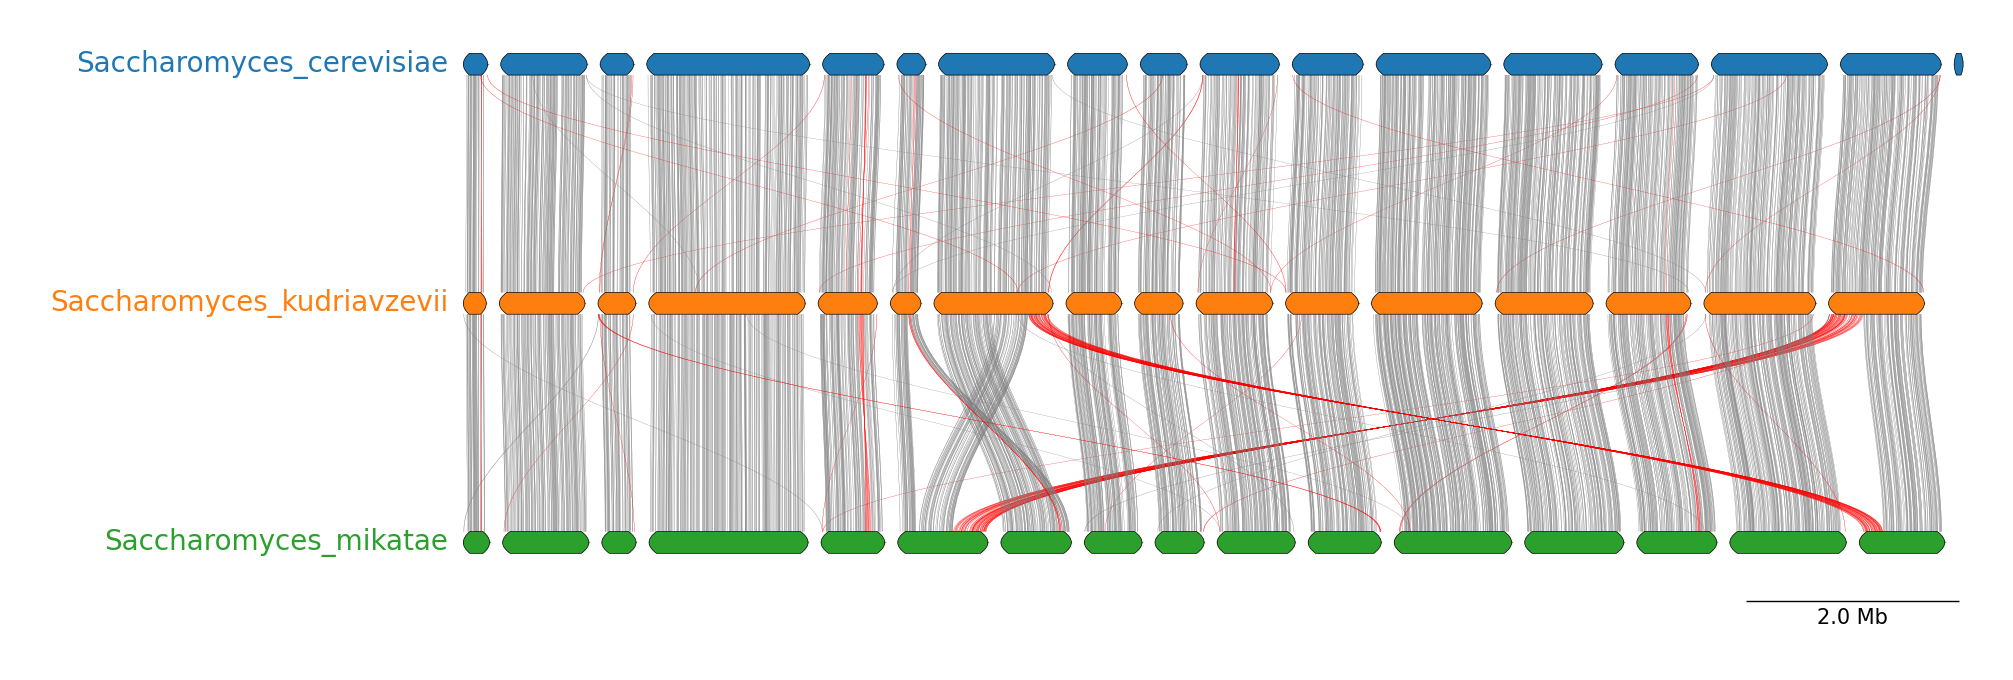

In [7]:
from pygenomeviz import GenomeViz
from pygenomeviz.align import MUMmer
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset, ColorCycler
ColorCycler.set_cmap("tab10")

gbk_files = load_example_genbank_dataset("saccharomyces")
gbk_list = list(map(Genbank, gbk_files))

gv = GenomeViz(feature_track_ratio=0.1)
gv.set_scale_bar(ymargin=2.0)

# Plot chromosomes
for gbk in gbk_list:
    color = ColorCycler()
    track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), space=0.01, label_kws=dict(color=color))
    for segment in track.segments:
        segment.add_feature(segment.start, segment.end, plotstyle="bigrbox", fc=color, lw=0.5)

# Run MUMmer alignment
align_coords = MUMmer(gbk_list).run()

# Plot MUMmer alignment links
if len(align_coords) > 0:
    for ac in align_coords:
        gv.add_link(ac.query_link, ac.ref_link, color="grey", inverted_color="red", curve=True, filter_length=1000)

fig = gv.plotfig()